In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

'C:\\Users\\chris'

In [8]:
#importing all the required packages
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib

In [9]:
dat_dir = "C:/Users/chris/OneDrive/Documents/Nci/sem 2/dmml 2/dataset"  #Dataset path
dat_dir = pathlib.Path(dat_dir) #converting data directory into pathlib
dat_dir

WindowsPath('C:/Users/chris/OneDrive/Documents/Nci/sem 2/dmml 2/dataset')

In [10]:
len(list(dat_dir.glob('*/*.jpg')))

7482

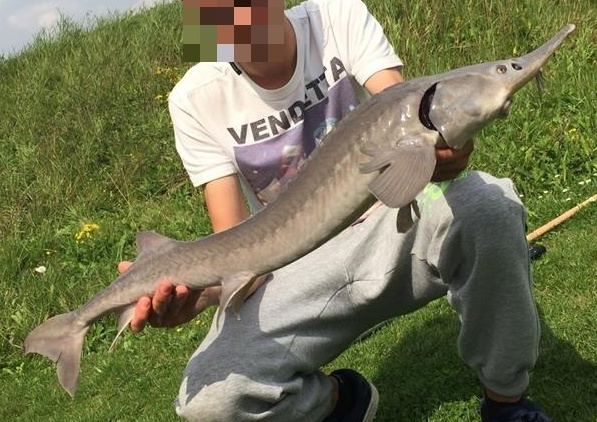

In [11]:
Acipenseridae = list(dat_dir.glob('Acipenseridae/*.jpg'))
Acipenseridae[0:2]
PIL.Image.open(str(Acipenseridae[65]))

In [12]:
fish_img_dict = {'Abramis brama' : list(dat_dir.glob('Abramis brama/*.jpg')),
'Acipenseridae' : list(dat_dir.glob('Acipenseridae/*.jpg')),
'Anguilla anguilla' : list(dat_dir.glob('Anguilla anguilla/*.jpg')),
'Aspius aspius' : list(dat_dir.glob('Aspius aspius/*.jpg')),
'Barbus barbus' : list(dat_dir.glob('Barbus barbus/*.jpg')),
'Blicca bjoerkna' : list(dat_dir.glob('Blicca bjoerkna/*.jpg')),
'Carassius carassius' : list(dat_dir.glob('Carassius carassius/*.jpg')),
'Carassius gibelio' : list(dat_dir.glob('Carassius gibelio/*.jpg')),
'Ctenopharyngodon idella' : list(dat_dir.glob('Ctenopharyngodon idella/*.jpg')),
'Cyprinus carpio' : list(dat_dir.glob('Cyprinus carpio/*.jpg')),
'Esox lucius' : list(dat_dir.glob('Esox lucius/*.jpg')),
'Gasterosteus aculeatus' : list(dat_dir.glob('Gasterosteus aculeatus/*.jpg')),
'Gobio gobio' : list(dat_dir.glob('Gobio gobio/*.jpg')),
'Gymnocephalus cernuus' : list(dat_dir.glob('Gymnocephalus cernuus/*.jpg')),
'Lepomis gibbosus' : list(dat_dir.glob('Lepomis gibbosus/*.jpg')),
'Leuciscus cephalus' : list(dat_dir.glob('Leuciscus cephalus/*.jpg')),
'Leuciscus idus' : list(dat_dir.glob('Leuciscus idus/*.jpg')),
'Leuciscus leuciscus' : list(dat_dir.glob('Leuciscus leuciscus/*.jpg')),
'Neogobius fluviatilis' : list(dat_dir.glob('Neogobius fluviatilis/*.jpg')),
'Neogobius kessleri' : list(dat_dir.glob('Neogobius kessleri/*.jpg')),
'Neogobius melanostomus' : list(dat_dir.glob('Neogobius melanostomus/*.jpg')),
'Perca fluviatilis' : list(dat_dir.glob('Perca fluviatilis/*.jpg')),
'Rhodeus amarus' : list(dat_dir.glob('Rhodeus amarus/*.jpg')),
'Rutilus rutilus' : list(dat_dir.glob('Rutilus rutilus/*.jpg')),
'Salmo trutta subsp. fario' : list(dat_dir.glob('Salmo trutta subsp. fario/*.jpg')),
'Sander lucioperca' : list(dat_dir.glob('Sander lucioperca/*.jpg')),
'Scardinius erythrophthalmus' : list(dat_dir.glob('Scardinius erythrophthalmus/*.jpg')),
'Silurus glanis' : list(dat_dir.glob('Silurus glanis/*.jpg')),
'Tinca tinca' : list(dat_dir.glob('Tinca tinca/*.jpg')),
'Vimba vimba' : list(dat_dir.glob('Vimba vimba/*.jpg'))}

In [13]:
fish_lbl_dict = {'Abramis brama' : 0,
'Acipenseridae' : 1,
'Anguilla anguilla' :2,
'Aspius aspius' :3,
'Barbus barbus' :4,
'Blicca bjoerkna' :5,
'Carassius carassius' :6,
'Carassius gibelio' :7,
'Ctenopharyngodon idella' :8,
'Cyprinus carpio' :9,
'Esox lucius' :10,
'Gasterosteus aculeatus' :11,
'Gobio gobio' :12, 
'Gymnocephalus cernuus' :13,
'Lepomis gibbosus' :14,
'Leuciscus cephalus' :15,
'Leuciscus idus' :16,
'Leuciscus leuciscus' :17,
'Neogobius fluviatilis' :18,
'Neogobius kessleri' :19,
'Neogobius melanostomus' :20,
'Perca fluviatilis' :21,
'Rhodeus amarus' :22,
'Rutilus rutilus' :23,
'Salmo trutta subsp. fario' :24,
'Sander lucioperca' :25,
'Scardinius erythrophthalmus' :26,
'Silurus glanis' :27,
'Tinca tinca' :28,
'Vimba vimba' :29}

In [14]:
x,y = [],[]
for fish_name, images in fish_img_dict.items():
    for image in images:
        img = str(image)
        x.append(img)
        y.append(fish_lbl_dict[fish_name])

In [15]:
import pandas as pd
df = pd.DataFrame(list(zip(x, y)),
               columns =['image', 'class'])
df

,image,class
0,C:\Users\chris\OneDrive\Documents\Nci\sem 2\dm...,0
1,C:\Users\chris\OneDrive\Documents\Nci\sem 2\dm...,0
2,C:\Users\chris\OneDrive\Documents\Nci\sem 2\dm...,0
3,C:\Users\chris\OneDrive\Documents\Nci\sem 2\dm...,0
4,C:\Users\chris\OneDrive\Documents\Nci\sem 2\dm...,0
...,...,...
7477,C:\Users\chris\OneDrive\Documents\Nci\sem 2\dm...,29
7478,C:\Users\chris\OneDrive\Documents\Nci\sem 2\dm...,29
7479,C:\Users\chris\OneDrive\Documents\Nci\sem 2\dm...,29
7480,C:\Users\chris\OneDrive\Documents\Nci\sem 2\dm...,29


![](https://www.mcgill.ca/oss/files/oss/styles/hd/public/fish_2.jpg?itok=tiod_UxK&timestamp=1582137895)

#### **Problem Statement**: we have been provided with image data set of different categorical fishes. objective is to create a model that identifies the fish category based on the picture. 

#### I have tried with Conv2d, Resenet & Mobilenet. MobileNet provides more accuracy than other models. 

# Read Dataset

Generating Dataframe with image path and label

DataFrame is create with 2 colmuns, 
1. path will have the paths to impage in the folder 
2. Label will have the corresponding label name for the image

In [16]:
df['class']=df['class'].astype('category')

Converting the "label" column as category type

In [17]:
df['class'].value_counts()

9     589
3     343
4     336
16    334
23    318
28    316
26    311
10    311
25    302
1     293
8     293
15    282
27    272
0     271
24    270
2     266
7     259
14    248
21    248
20    244
5     244
6     242
13    236
12    228
18    102
19     93
29     71
17     66
11     58
22     36
Name: class, dtype: int64

In [18]:
path = df['image']
label = df['class']

In [19]:
## RandomOverSampler to handle imbalanced data

from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler(sampling_strategy='not majority', random_state=42)

In [20]:
x_sampled, y_sampled = os.fit_resample(path.values.reshape(-1, 1), label)

In [21]:
x_samp = []
for i in x_sampled:
  for j in i:
    x_samp.append(j)

In [22]:
df_sampled = pd.DataFrame({'image': np.array(x_samp), 'class':np.array(y_sampled)})

In [23]:
df_sampled['class'].value_counts()

0     589
1     589
28    589
27    589
26    589
25    589
24    589
23    589
22    589
21    589
20    589
19    589
18    589
17    589
16    589
15    589
14    589
13    589
12    589
11    589
10    589
9     589
8     589
7     589
6     589
5     589
4     589
3     589
2     589
29    589
Name: class, dtype: int64

There are 9 category of fishes and each are unifromly distrubuted. so no prob on imbalance in the data

# Exploratory Data Analysis

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df_sampled['class'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], dtype=int64)

**Let us try plot the 1 sample image from each category**

IndexError: index 9 is out of bounds for axis 0 with size 9

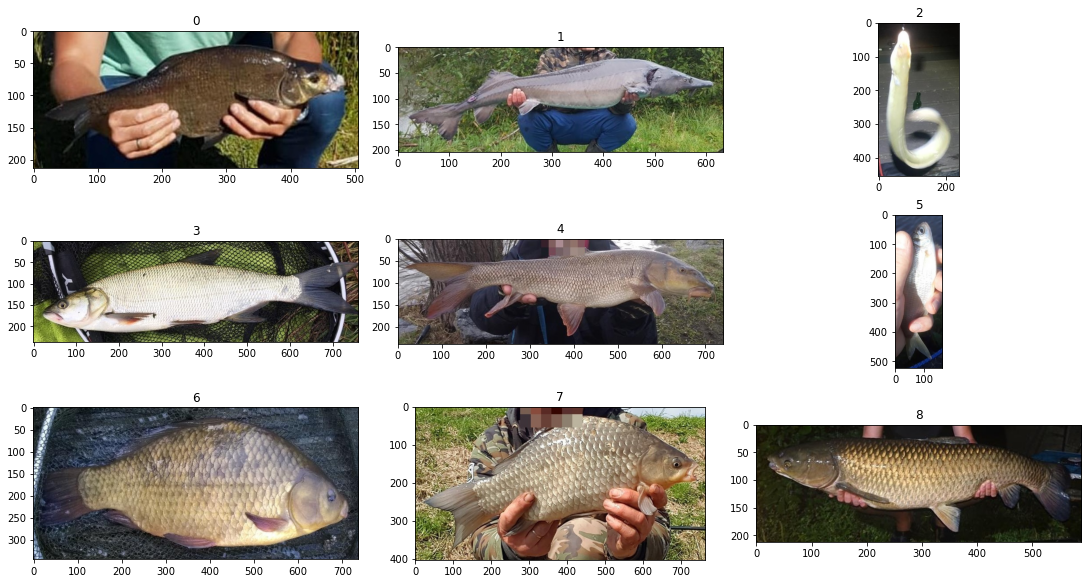

In [26]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,8), constrained_layout=True)
ax=ax.flatten()
j=0
for i in df_sampled['class'].unique():
    
    ax[j].imshow(plt.imread(df_sampled[df_sampled['class']==i].iloc[0,0]))
    ax[j].set_title(i)
    j=j+1

In [ ]:
plt.imread(df['path'][1]).shape

# Train Test split

In [27]:

from sklearn.model_selection import train_test_split
X_train, X_test=train_test_split(df_sampled, test_size=0.2, random_state=42)

In [28]:
print(X_train.shape)
print(X_test.shape)

(14136, 2)
(3534, 2)


In [29]:
X_train = X_train.astype(str)
X_test = X_test.astype(str)


## Creating the image dataset using Tensorflow 
### we are using resnet_v2 preprocessing step to check if we can use Reset model in trasform learning

In [30]:
from tensorflow.keras.applications import ResNet50V2, MobileNetV2
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

trainGen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.3)
testGen =ImageDataGenerator(preprocessing_function= preprocess_input)
X_train_img = trainGen.flow_from_dataframe(dataframe=X_train, x_col='image', y_col='class',class_mode='categorical', subset='training', color_mode='rgb', batch_size=32)
X_val_img = trainGen.flow_from_dataframe(dataframe=X_train, x_col='image', y_col='class',class_mode='categorical', subset='validation', color_mode='rgb', batch_size=32)
X_test_img =testGen.flow_from_dataframe(dataframe=X_test, x_col='image', y_col='class',class_mode='categorical', color_mode='rgb', batch_size=32, shuffle=False)

Found 9896 validated image filenames belonging to 30 classes.
Found 4240 validated image filenames belonging to 30 classes.
Found 3534 validated image filenames belonging to 30 classes.


### Plotting image after preprocessing

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\chris\anaconda3\lib\site-packages\matplotlib\text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


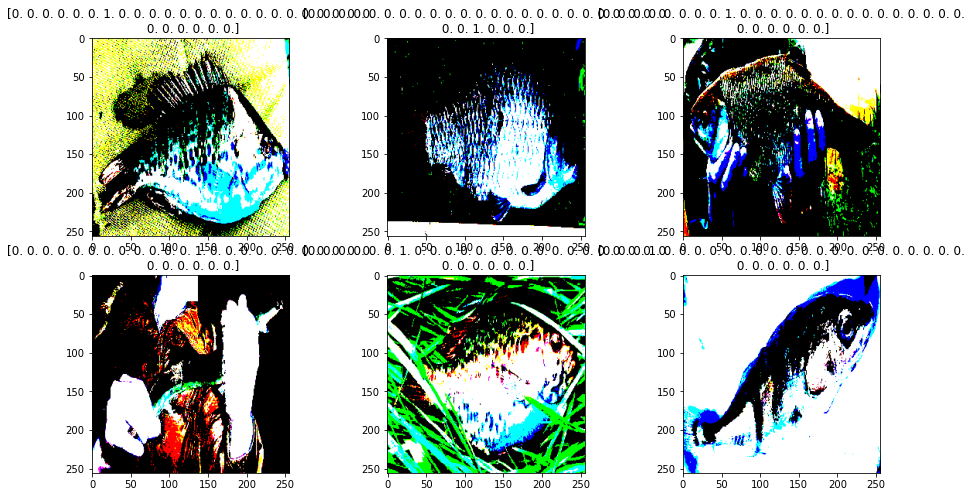

In [31]:
fit, ax= plt.subplots(nrows=2, ncols=3, figsize=(15,8))
ax=ax.flatten()
j=0
for _ in range(6):
    img, label = X_test_img.next()
    #print(img.shape)   #  (1,256,256,3)
    ax[j].imshow(img[0],)
    ax[j].set_title(label[0])
    #plt.show()
    j=j+1

In [32]:
X_test_img[0][0].shape

(32, 256, 256, 3)

In [33]:
image_shape=(180,180,3)

#### Lets check the classes are appropriate in both Test & Train dataset

In [34]:
X_train_img.class_indices

{'0': 0,
 '1': 1,
 '10': 2,
 '11': 3,
 '12': 4,
 '13': 5,
 '14': 6,
 '15': 7,
 '16': 8,
 '17': 9,
 '18': 10,
 '19': 11,
 '2': 12,
 '20': 13,
 '21': 14,
 '22': 15,
 '23': 16,
 '24': 17,
 '25': 18,
 '26': 19,
 '27': 20,
 '28': 21,
 '29': 22,
 '3': 23,
 '4': 24,
 '5': 25,
 '6': 26,
 '7': 27,
 '8': 28,
 '9': 29}

In [35]:
X_val_img.class_indices

{'0': 0,
 '1': 1,
 '10': 2,
 '11': 3,
 '12': 4,
 '13': 5,
 '14': 6,
 '15': 7,
 '16': 8,
 '17': 9,
 '18': 10,
 '19': 11,
 '2': 12,
 '20': 13,
 '21': 14,
 '22': 15,
 '23': 16,
 '24': 17,
 '25': 18,
 '26': 19,
 '27': 20,
 '28': 21,
 '29': 22,
 '3': 23,
 '4': 24,
 '5': 25,
 '6': 26,
 '7': 27,
 '8': 28,
 '9': 29}

In [36]:
X_test_img.class_indices

{'0': 0,
 '1': 1,
 '10': 2,
 '11': 3,
 '12': 4,
 '13': 5,
 '14': 6,
 '15': 7,
 '16': 8,
 '17': 9,
 '18': 10,
 '19': 11,
 '2': 12,
 '20': 13,
 '21': 14,
 '22': 15,
 '23': 16,
 '24': 17,
 '25': 18,
 '26': 19,
 '27': 20,
 '28': 21,
 '29': 22,
 '3': 23,
 '4': 24,
 '5': 25,
 '6': 26,
 '7': 27,
 '8': 28,
 '9': 29}

# Tensorflow Model
#### MobileNet Transfer learning
I tried with both Resnet & MobileNet, MobileNet gives better accuracy result

In [37]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
pre_trained= MobileNetV2(include_top=False, pooling='avg', input_shape=image_shape)

#for layers in pre_trained.layers:
#    layers.trainable=False
pre_trained.trainable=False

inp_model = pre_trained.input
#x=Flatten()(pre_trained.output)
x=Dense(128, activation='relu')(pre_trained.output)
x=Dropout(0.5)(x)
x=Dense(128, activation='relu')(x)
output=Dense(30, activation='softmax')(x)
model = Model(inputs=inp_model, outputs=output)




model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',patience=1)

results = model.fit(X_train_img,epochs=5,
                              validation_data=X_val_img,
                                callbacks=[early_stop])


Epoch 1/5
310/310 [==============================] - 228s 729ms/step - loss: 3.2502 - accuracy: 0.0799 - val_loss: 2.8492 - val_accuracy: 0.1946
Epoch 2/5
310/310 [==============================] - 227s 731ms/step - loss: 2.8116 - accuracy: 0.1761 - val_loss: 2.4635 - val_accuracy: 0.2896
Epoch 3/5
310/310 [==============================] - 224s 722ms/step - loss: 2.5884 - accuracy: 0.2245 - val_loss: 2.2751 - val_accuracy: 0.3507
Epoch 4/5
310/310 [==============================] - 232s 748ms/step - loss: 2.4557 - accuracy: 0.2534 - val_loss: 2.1625 - val_accuracy: 0.3835
Epoch 5/5
310/310 [==============================] - 225s 727ms/step - loss: 2.3378 - accuracy: 0.2867 - val_loss: 1.9764 - val_accuracy: 0.4229


Text(0.5, 1.0, 'Loss')

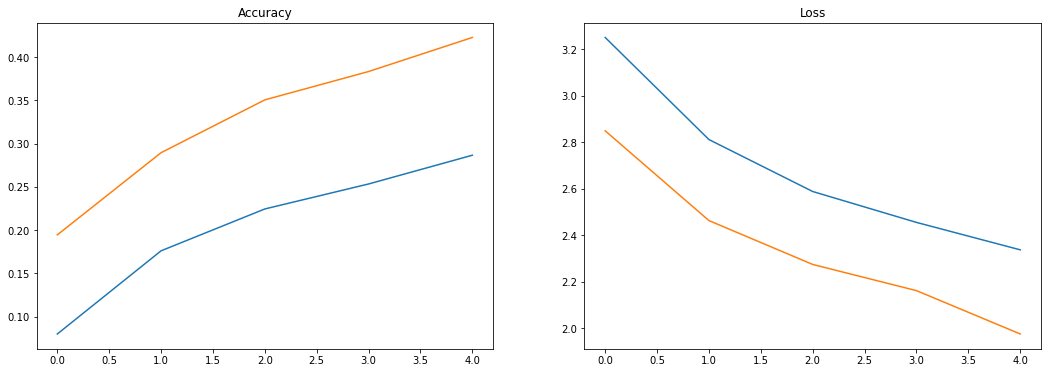

In [38]:
result=pd.DataFrame(results.history)
fig, ax=plt.subplots(nrows=1, ncols=2,figsize=(18,6))
ax=ax.flatten()
ax[0].plot(result[['accuracy','val_accuracy']])
ax[0].set_title("Accuracy")
ax[1].plot(result[['loss','val_loss']])
ax[1].set_title("Loss")


# Model Prediction

In [39]:
pred = model.predict(X_test_img)
pred=np.argmax(pred,axis=1)

111/111 [==============================] - 57s 509ms/step


In [40]:
pred_df=X_test.copy()
labels={}
for l,v in X_test_img.class_indices.items():
    labels.update({v:l})
pred_df['pred']=pred
pred_df['pred']=pred_df['pred'].apply(lambda x: labels[x])
    

Accuracy Score: 0.4182229767968308


<AxesSubplot:>

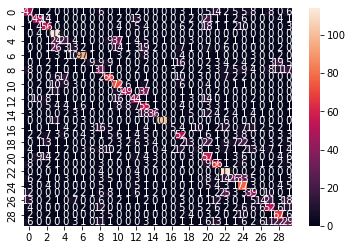

In [42]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(f"Accuracy Score: {accuracy_score(pred_df['class'],pred_df['pred'])}")
sns.heatmap(confusion_matrix(pred_df['class'],pred_df['pred']), annot=True, fmt='2d')

                                                   path            label  \
7940  ../input/a-large-scale-fish-dataset/Fish_Datas...  Gilt-Head Bream   
1162  ../input/a-large-scale-fish-dataset/Fish_Datas...  Black Sea Sprat   
582   ../input/a-large-scale-fish-dataset/Fish_Datas...  Hourse Mackerel   
4081  ../input/a-large-scale-fish-dataset/Fish_Datas...            Trout   
8412  ../input/a-large-scale-fish-dataset/Fish_Datas...    Red Sea Bream   
8730  ../input/a-large-scale-fish-dataset/Fish_Datas...    Red Sea Bream   

                 pred  
7940  Gilt-Head Bream  
1162  Black Sea Sprat  
582   Hourse Mackerel  
4081            Trout  
8412    Red Sea Bream  
8730    Red Sea Bream  


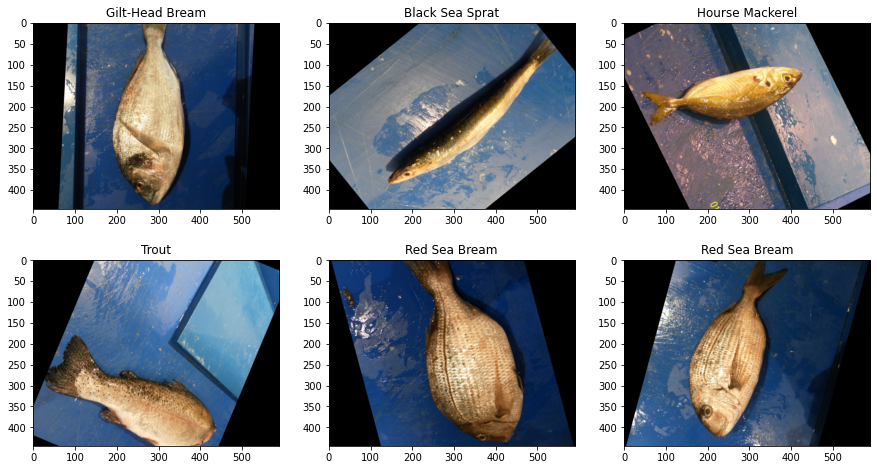

In [ ]:
print(pred_df[pred_df['label']==pred_df['pred']].head(6))
fig, ax=plt.subplots(nrows=2, ncols=3, figsize=(15,8))
ax=ax.flatten()
imlist=pred_df[pred_df['label']==pred_df['pred']].head(6).reset_index()
for i in range(0,6):
    ax[i].imshow(plt.imread(imlist['path'][i]))
    ax[i].set_title(imlist['label'][i])

Please review and provide yout comments for further improvements. 